In [1]:
import statsmodels.formula.api as smf
from numpy.random import normal, binomial
from scipy.special import expit
from pandas import DataFrame
from graphviz import Digraph

In [2]:
sel_dag = Digraph(comment='Selection Bias')
sel_dag.edge('x', 'y', constraint='False')
sel_dag.edges([('x', 'c'), ('y', 'c')])
sel_dag.node('c', shape='rectangle')

# Simulation Part 5 - Selection Bias

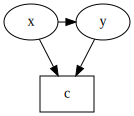

In [3]:
sel_dag

## Let's create our data

In [4]:
n = 100000

Which variable do we start with?

We need to do x first this time!

In [5]:
# Generate data for x
x = normal(size=n)

Then we do y

In [6]:
# Specify betas
by = {'i': 0, 'x': 1}

In [7]:
# y from a linear model
y = normal(by['i'] + by['x']*x)

And lastly s

In [8]:
# Specify betas
bs = {'i': 0, 'x': 1, 'y': 2}

In [9]:
# Generate data for s using y_linear
s = normal(bs['i'] + bs['x']*x + bs['y']*y)

In [10]:
data = DataFrame(dict(y=y, x=x, s=s))
data.head()

,s,x,y
0,-1.952696,-1.459904,-0.997381
1,-3.836586,-1.725862,-0.335943
2,-1.972660,0.386554,-0.110408
3,-4.431952,-0.992206,-1.871787
4,-1.286402,0.584373,0.177180


## Let's fit the model

In [11]:
by

{'i': 0, 'x': 1}

In [12]:
smf.glm('y ~ x', data).fit().params

Intercept   -0.000258
x            1.003332
dtype: float64

In [13]:
smf.glm('y ~ x + s', data).fit().params

Intercept   -0.000487
x           -0.202713
s            0.400816
dtype: float64